### Own class and methods

In [1]:
import knn

### Other imports

In [2]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import math

## Data preparation

In [3]:
digits = load_digits()

Sample Example 😎
5


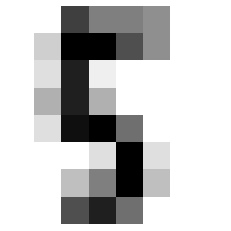

In [10]:
fig, ax = plt.subplots()
ax.set_axis_off()
ax.imshow(digits.images[25], cmap=plt.cm.gray_r)
print("Sample Example 😎")
print(digits.target[25])
plt.savefig('media\\five5.png')

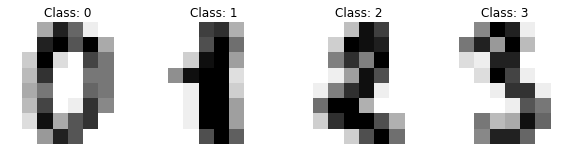

In [11]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Class: %i" % label)
plt.savefig('media\\digits.png')

Sample Example 😎
Five representant


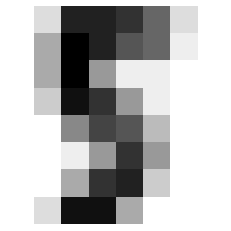

In [14]:
fig, ax = plt.subplots()
ax.set_axis_off()
ax.imshow(knn.create_representatives(digits.images,digits.target)[0][40], cmap=plt.cm.gray_r)
print("Sample Example 😎")
print("Five representant")
plt.savefig('media\\five_representant.png')

#### Data division for cross-validation

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(
    digits.images, digits.target, test_size=0.25, shuffle=False
)

## Models tested

In [8]:
knn_model = knn.KNN(n_neighbours=7,representatives=False, project=False)

In [9]:
knn_model_representatives = knn.KNN(n_neighbours=2,representatives=True, project=False)

In [10]:
knn_model_project = knn.KNN(n_neighbours=2,representatives=False, project=True)

In [11]:
import time

In [12]:
st = time.process_time()
knn_model.fit(X_train,Y_train)
et = time.process_time()
print(f" Base fit: {et-st} s")

st = time.process_time()
knn_model_representatives.fit(X_train,Y_train)
et = time.process_time()
print(f" Representatives fit: {et-st} s")

st = time.process_time()
knn_model_project.fit(X_train,Y_train)
et = time.process_time()
print(f" Projection fit: {et-st} s")

 Base fit: 0.0 s
 Representatives fit: 0.0 s
 Projection fit: 0.0 s


In [13]:
dif__n = knn_model.score_for_n_in_range(X_test,Y_test,15)
dif_n_representatives = knn_model_representatives.score_for_n_in_range(X_test,Y_test,15)
dif_n_project = knn_model_project.score_for_n_in_range(X_test,Y_test,15)

In [14]:
st = time.process_time()
cross = knn_model.cross_val_score(digits.images,digits.target)
et = time.process_time()
print(f" Base cross: {et-st} s")

st = time.process_time()
cross_representatives = knn_model_representatives.cross_val_score(digits.images,digits.target)
et = time.process_time()
print(f" Representatives cross: {et-st} s")

st = time.process_time()
cross_project = knn_model_project.cross_val_score(digits.images,digits.target)
et = time.process_time()
print(f" Projection cross: {et-st} s")

WARNING! Cannot divide given dataset equally into 4 parts. Ignoring last 1 elements!
 Base cross: 19.875 s
WARNING! Cannot divide given dataset equally into 4 parts. Ignoring last 1 elements!
 Representatives cross: 1.25 s
WARNING! Cannot divide given dataset equally into 4 parts. Ignoring last 1 elements!
 Projection cross: 19.53125 s


In [39]:
print(f"cross Base n=7: {[round(x*100,2) for x in cross[0]]}\nwith mean acc: {round(np.mean(cross[0])*100,2)}")
print(f"cross Representatives n=2: {[round(x*100,2) for x in cross_representatives[0]]}\nwith mean acc: {round(np.mean(cross_representatives[0])*100,2)}")
print(f"cross Projection n=2: {[round(x*100,2) for x in cross_project[0]]}\nwith mean acc: {round(np.mean(cross_project[0])*100,2)}")

cross Base n=7: [96.44, 95.55, 97.33, 96.21]
with mean acc: 96.38
cross Representatives n=2: [91.76, 91.54, 93.76, 90.42]
with mean acc: 91.87
cross Projection n=2: [73.5, 75.95, 81.74, 82.63]
with mean acc: 78.45


In [35]:
print(f"cross Base n=7: {[round(x*100,2) for x in cross[2].T[0]]}\nwith mean precision: {round(np.mean(cross[2].T[0])*100,2)}")
print(f"cross Representatives n=2: {[round(x*100,2) for x in cross_representatives[2].T[0]]}\nwith mean precision: {round(np.mean(cross_representatives[2].T[0])*100,2)}")
print(f"cross Projection n=2: {[round(x*100,2) for x in cross_project[2].T[0]]}\nwith mean precision: {round(np.mean(cross_project[2].T[0])*100,2)}")

cross Base n=7: [96.54, 95.58, 97.4, 96.25]
with mean precision: 96.44
cross Representatives n=2: [92.44, 92.04, 93.93, 90.72]
with mean precision: 92.28
cross Projection n=2: [74.63, 76.03, 82.15, 82.59]
with mean precision: 78.85


In [36]:
print(f"cross Base n=7: {[round(x*100,2) for x in cross[2].T[1]]}\nwith mean recall: {round(np.mean(cross[2].T[1])*100,2)}")
print(f"cross Representatives n=2: {[round(x*100,2) for x in cross_representatives[2].T[1]]}\nwith mean recall: {round(np.mean(cross_representatives[2].T[1])*100,2)}")
print(f"cross Projection n=2: {[round(x*100,2) for x in cross_project[2].T[1]]}\nwith mean recall: {round(np.mean(cross_project[2].T[1])*100,2)}")

cross Base n=7: [96.43, 95.53, 97.39, 96.14]
with mean recall: 96.37
cross Representatives n=2: [91.69, 91.47, 93.89, 90.41]
with mean recall: 91.87
cross Projection n=2: [73.83, 75.67, 81.93, 82.4]
with mean recall: 78.46


In [37]:
print(f"cross Base n=7: {[round(x*100,2) for x in cross[2].T[2]]}\nwith mean f1-score: {round(np.mean(cross[2].T[2])*100,2)}")
print(f"cross Representatives n=2: {[round(x*100,2) for x in cross_representatives[2].T[2]]}\nwith mean f1-score: {round(np.mean(cross_representatives[2].T[2])*100,2)}")
print(f"cross Projection n=2: {[round(x*100,2) for x in cross_project[2].T[2]]}\nwith mean f1-score: {round(np.mean(cross_project[2].T[2])*100,2)}")

cross Base n=7: [96.41, 95.52, 97.39, 96.1]
with mean f1-score: 96.36
cross Representatives n=2: [91.81, 91.5, 93.88, 90.32]
with mean f1-score: 91.88
cross Projection n=2: [73.54, 75.54, 81.82, 82.13]
with mean f1-score: 78.26


In [19]:
import seaborn as sns

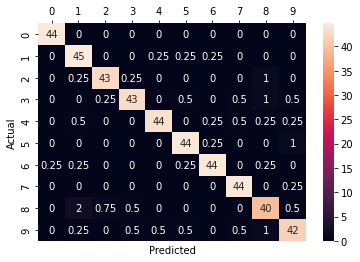

In [20]:
ax = sns.heatmap(sum(cross[1])/4,
            annot=True)
ax.set(xlabel="Predicted", ylabel="Actual")
ax.xaxis.tick_top()
plt.savefig('media\\CM_base.png')

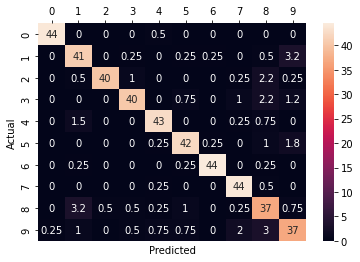

In [21]:
ax = sns.heatmap(sum(cross_representatives[1])/4,
            annot=True)
ax.set(xlabel="Predicted", ylabel="Actual")
ax.xaxis.tick_top()
plt.savefig('media\\CM_representatives.png')

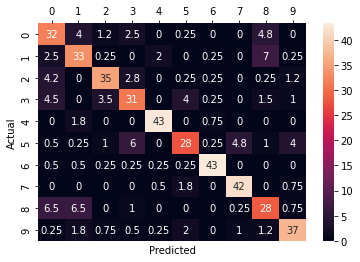

In [22]:
ax = sns.heatmap(sum(cross_project[1])/4,
            annot=True)
ax.set(xlabel="Predicted", ylabel="Actual")
ax.xaxis.tick_top()
plt.savefig('media\\CM_projection.png')

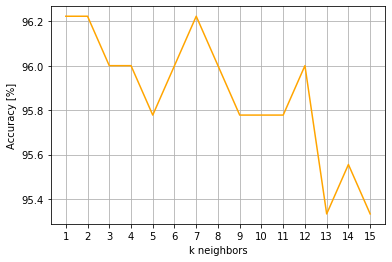

In [23]:
plt.plot(np.arange(1,16),dif__n[0]*100,
         color = 'orange')
plt.xticks(np.arange(1,16))
plt.grid()
plt.xlabel("k neighbors")
plt.ylabel("Accuracy [%]")
plt.savefig('media\\dif_k_base.png')